<a href="https://colab.research.google.com/github/ambikamp-14/Diabetes-Prediction-ML/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("diabetes - diabetes.csv")

df.head()

Saving diabetes - diabetes.csv to diabetes - diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

Shape of dataset: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


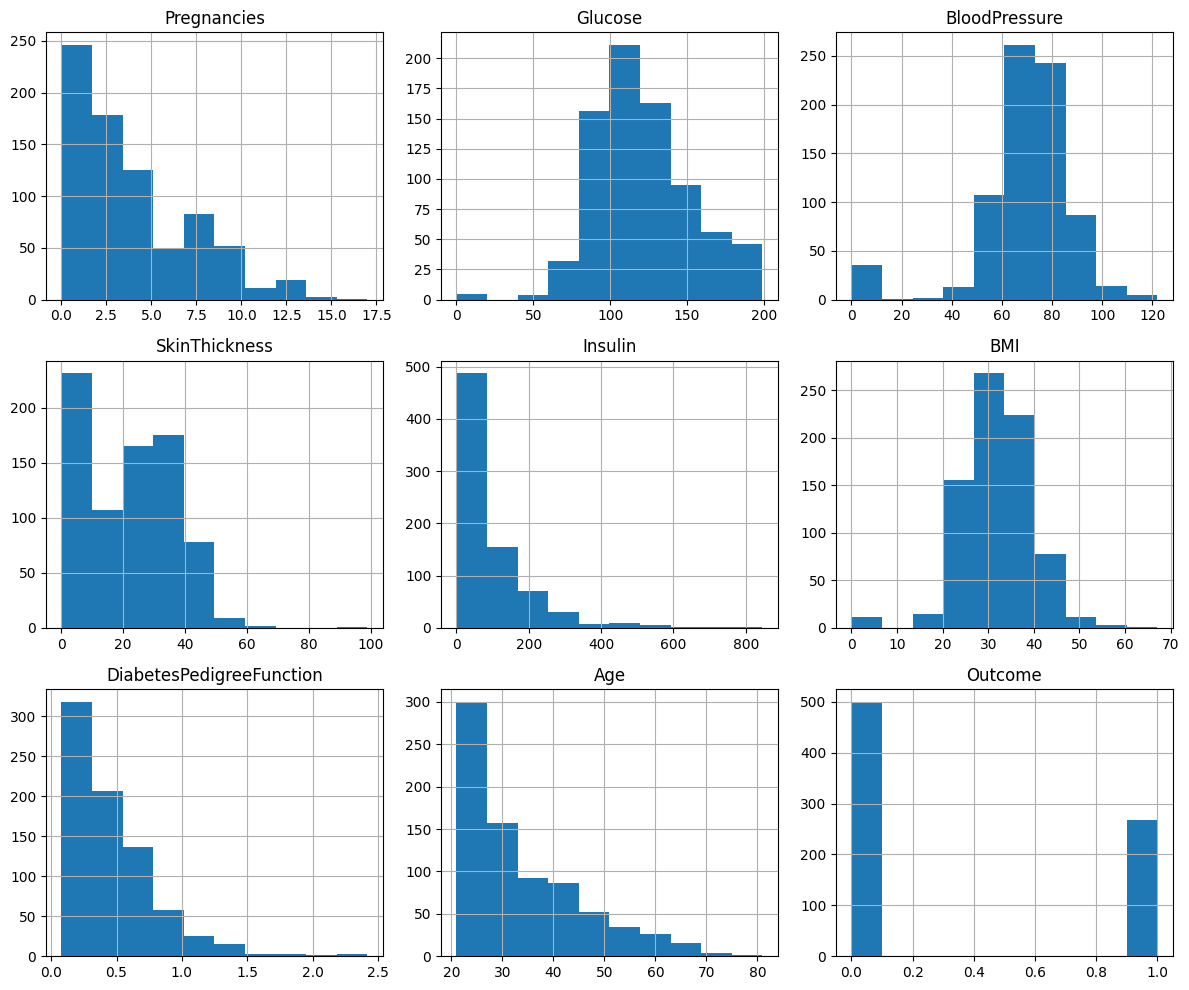

In [5]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

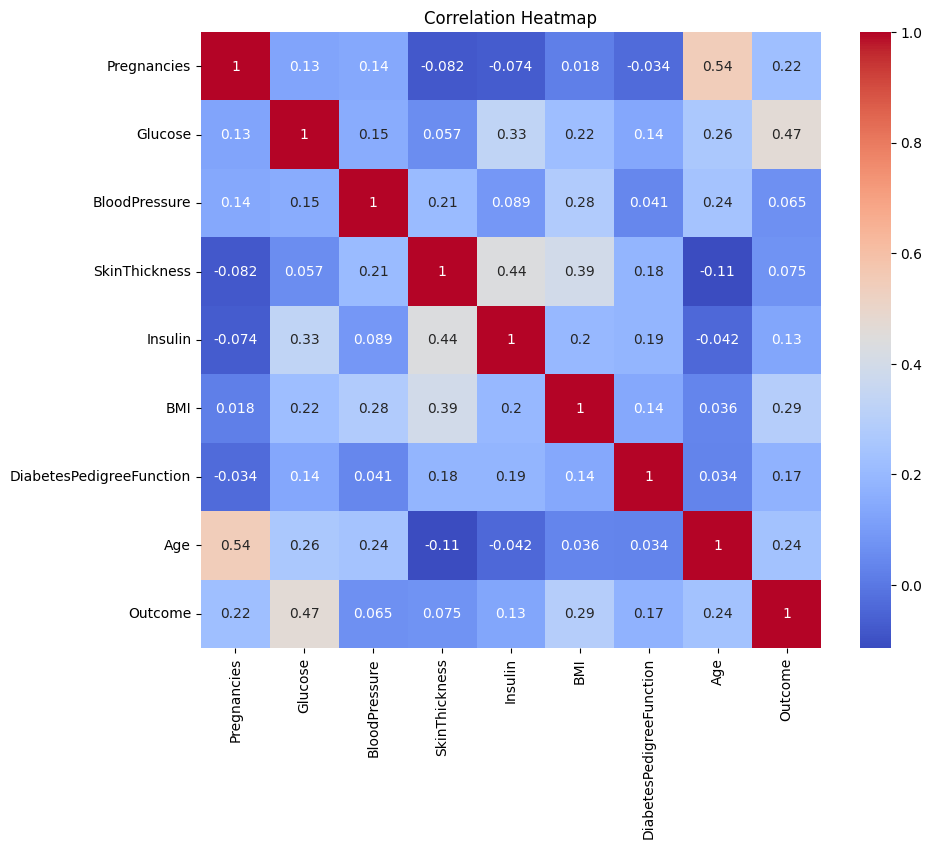

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

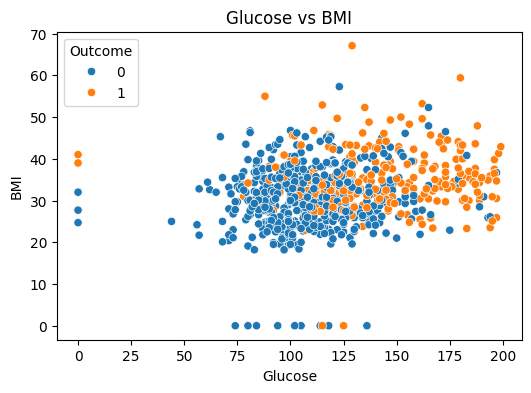

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title("Glucose vs BMI")
plt.show()

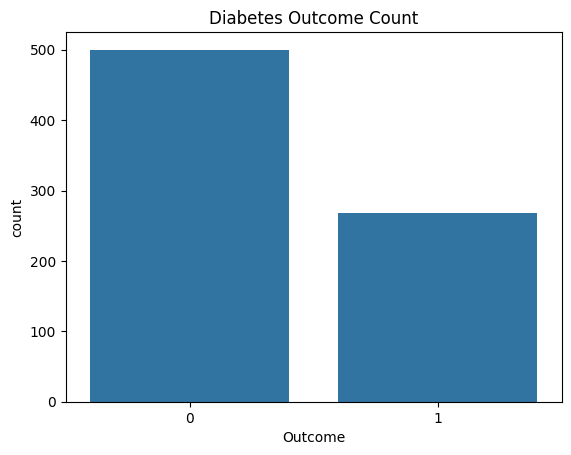

In [8]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Count")
plt.show()

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [14]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7532467532467533


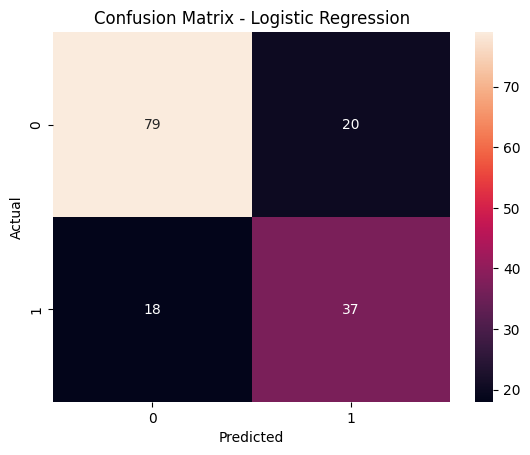

In [15]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [17]:
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7207792207792207


In [18]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [19]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [20]:
print("SVM Accuracy:",
      accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.7337662337662337


In [21]:
print("Classification Report - SVM:\n")
print(classification_report(y_test, y_pred_svm))

Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



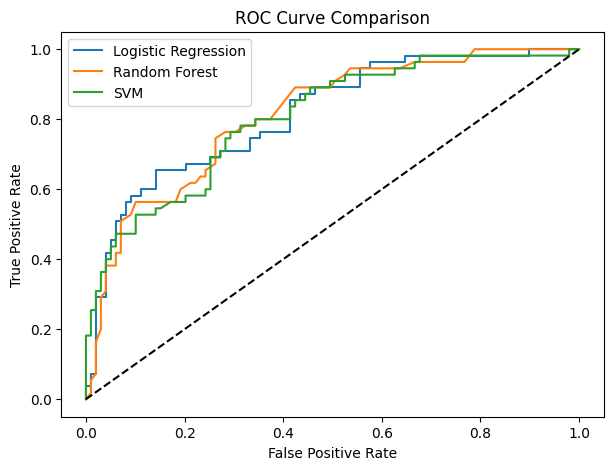

AUC Scores:
Logistic Regression: 0.8146923783287419
Random Forest: 0.8124885215794309
SVM: 0.8051423324150596


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_probs = lr.predict_proba(X_test)[:,1]
rf_probs = rf.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(7,5))
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot(svm_fpr, svm_tpr, label="SVM")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, lr_probs))
print("Random Forest:", roc_auc_score(y_test, rf_probs))
print("SVM:", roc_auc_score(y_test, svm_probs))

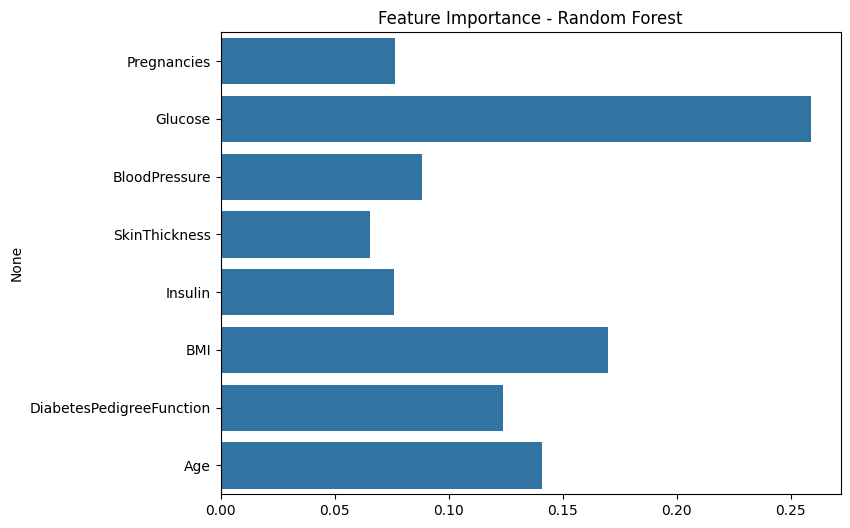

In [23]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [24]:
input_data = np.array([[2,120,70,20,85,28.5,0.5,35]])

input_scaled = scaler.transform(input_data)

prediction = rf.predict(input_scaled)

if prediction[0] == 1:
    print("The person is Diabetic")
else:
    print("The person is Not Diabetic")

The person is Not Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
